# 探索数据集-泰坦尼克

# 1.问题调查

## 1.1.有哪些因素会让船上的人生还率更高？

1.年龄与生还率的关系

2.性别与生还率的关系

3.票价与生还率的关系

## 2.数据加工

## 2.1.数据采集

### 2.1.1.数据字段含义

Variable | Definition | Key
---------| -----------|------
PassengerId | Passenger id(旅客编号) |
survival | Survival(旅客) | 0 = No, 1 = Yes
pclass | Ticket class(船票类型) | 1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex(性别) |	
Age | Age(年龄) | in years	
sibsp | of siblings / spouses aboard the Titanic(一同上船的兄弟姐妹或配偶) |	
parch | of parents / children aboard the Titanic(一同上船的父母或孩子) |	
ticket | Ticket number(票号) |	
fare | Passenger fare(票价) |	
cabin | Cabin number(船舱) |	
embarked | Port of Embarkation(出发港) | C = Cherbourg, Q = Queenstown, S = Southampton
 


### 2.1.2.变量使用注意事项
**pclass(船票类型): **

A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower

**age(年龄):  **

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp(一同上船的兄弟姐妹或配偶): **

The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

**parch(一同上船的父母或孩子): **

The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### 2.1.3.通用函数

In [4]:
'''
汇总常用的数据处理函数
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt

'''
加载数据文件
必须是 csv 文件
'''
def load_data_csv (filename):
    titanic_df = pd.read_csv(filename)
    return titanic_df


'''
修正数据类型
'''
#日期类型修正
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y,-%m-%d')

#整形修正
def parse_maybe_int(num):
    if num == '':
        return None
    else:
        return int(i)
    
    
'''
皮尔逊相关系数
correlation = average of (x in standard units) times(y in standard units)
std(ddof=0)
pearson`s r(-1, 1)
'''
def correlation(x, y):
    x_std = (x - x.mean())/x.std(ddof=0)
    y_std = (y - y.mean())/y.std(ddof=0)
    return (x_std * y_std).mean()


### 2.1.4.导入数据

In [94]:
titanic_df = load_data_csv('titanic-data.csv')
#前5行
# print titanic_df.head()
titanic_df.head()
#末尾5行
titanic_df.tail()
#索引
print titanic_df.index
#列
print titanic_df.columns
#底层数据
titanic_df.values
#统计汇总
titanic_df.describe()
#数据转置
# titanic_df.T
#按轴进行排序
titanic_df.sort_index(axis=0, ascending=False)
#按值进排序
titanic_df.sort_values(by='Age', axis=0, ascending=True)
titanic_df.sort_values(by=['Age','Fare'], axis=0, ascending=[True,True],na_position='last')

#去掉缺失值
titanic_df.dropna(axis=0)
#第一行
titanic_df.iloc[0]
titanic_df.loc[0]
#指定列
titanic_df.loc[:, 'Age']
titanic_df.loc[:, 'Age': "Fare"]
titanic_df.iloc[:, 'Age': "Fare"]



RangeIndex(start=0, stop=891, step=1)
Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


,Age,SibSp,Parch,Ticket,Fare
0,22.0,1,0,A/5 21171,7.2500
1,38.0,1,0,PC 17599,71.2833
2,26.0,0,0,STON/O2. 3101282,7.9250
3,35.0,1,0,113803,53.1000
4,35.0,0,0,373450,8.0500
5,NaN,0,0,330877,8.4583
6,54.0,0,0,17463,51.8625
7,2.0,3,1,349909,21.0750
8,27.0,0,2,347742,11.1333
9,14.0,1,0,237736,30.0708


## 2.2.数据清理

### 2.2.1.异常数据项

1.Age：年龄信息有小数和空值需要排除
*需要对小数，进行修数，排除异常空值数据*

2.Fare：票价有0的情况
*需要排除异常数据*

3.Cabin：船舱号有空的情况
*不做参考因素，不处理*

4.Embarked：出发港有空的情况
*不做参考因素，不处理*

5.Pclass：船票类型与票价的对应中有高类型对应低票价情况，
*需要排除特别数据*

In [17]:
def check_age(num):
    print num

data = titanic_df['Age'].apply(check_age)   


22.0
38.0
26.0
35.0
35.0
nan
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
nan
31.0
nan
35.0
34.0
15.0
28.0
8.0
38.0
nan
19.0
nan
nan
40.0
nan
nan
66.0
28.0
42.0
nan
21.0
18.0
14.0
40.0
27.0
nan
3.0
19.0
nan
nan
nan
nan
18.0
7.0
21.0
49.0
29.0
65.0
nan
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
nan
nan
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
nan
nan
0.83
30.0
22.0
29.0
nan
28.0
17.0
33.0
16.0
nan
23.0
24.0
29.0
20.0
46.0
26.0
59.0
nan
71.0
23.0
34.0
34.0
28.0
nan
21.0
33.0
37.0
28.0
21.0
nan
38.0
nan
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
nan
32.5
32.5
54.0
12.0
nan
24.0
nan
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
nan
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
nan
51.0
16.0
30.0
nan
nan
44.0
40.0
26.0
17.0
1.0
9.0
nan
45.0
nan
28.0
61.0
4.0
1.0
21.0
56.0
18.0
nan
50.0
30.0
36.0
nan
nan
9.0
1.0
4.0
nan
nan
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
nan
42.0
nan
24.0
28.0
nan
34.0
45.5
18.0
2.0
32.0
26.0
16.0
40.0
24.0
35.0
2

### 2.2.2.修正数据类型

Age:需要修数，将小数修改为1

## 3.数据探索

### 3.1.探索年龄与生还率的关系

#### 3.1.1.探索

In [76]:
#生还数据
Survived = titanic_df['Survived']
# print Survived
#年龄数据
Age = titanic_df['Age']
# print Age

#年龄和生还率的相关性
r = correlation(Survived, Age)
print r

-0.0779826784139


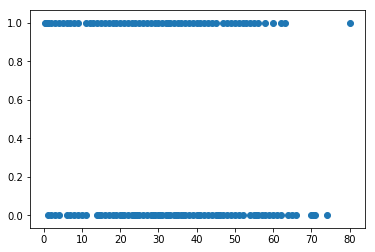

In [77]:
#年龄和生还率的散列图
data_by_age = titanic_df.groupby(['Age','Survived'], as_index=False).mean()
#print data_by_age.head()['Age']
plt.scatter(data_by_age['Age'], data_by_age['Survived'])


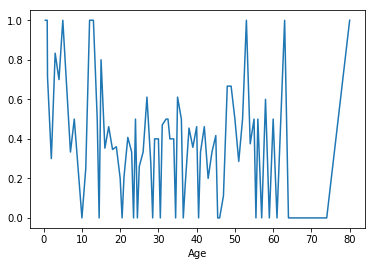

In [54]:
survived_by_age = titanic_df.groupby('Age').mean()['Survived']
# print survived_by_age
survived_by_age.plot()


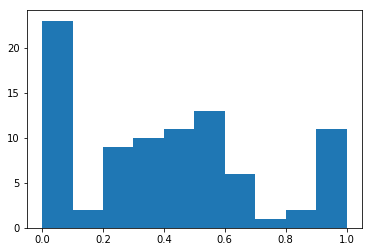

In [55]:
#直方图
plt.hist(survived_by_age)
plt.show()

#### 3.1.2.分析

根据皮尔逊相关系数 r = -0.0779826784139 接近0

#### 3.1.3.结论

年龄与生还率的相关度较低


### 3.2.性别与生还率的关系

#### 3.2.1.探索

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


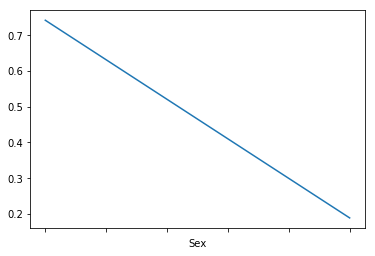

In [43]:
#根据性别分组
survived_by_sex = titanic_df.groupby('Sex').mean()['Survived']
print survived_by_sex
survived_by_sex.plot()



#### 3.2.2.分析

根据皮尔逊相关系数 r = -0.0779826784139 接近0

#### 3.2.3.结论

年龄与生还率的相关度较低


### 3.3.票价与生还率的关系

#### 3.2.1.探索

#### 3.2.2.分析

根据皮尔逊相关系数 r = -0.0779826784139 接近0

#### 3.2.3.结论

年龄与生还率的相关度较低


## 4.总结和预测

### 4.1.总结

### 4.2.预测

## 5.研究结果交流